In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
import numpy as np
from MoveNN import RLModel
from ProbNN import ProbabilityNN

In [2]:
def test_probability_nn(batch_size):
    input_shape = (batch_size, 185, 8, 8)
    expected_output_shape = (batch_size, 6, 8, 8)

    # Create a random input tensor with the specified shape
    input_tensor = torch.randn(input_shape)

    # Initialize the ProbabilityNN model
    model = ProbabilityNN()

    # Pass the input tensor through the model
    output_tensor = model(input_tensor)

    # Check if the output tensor has the expected shape
    assert output_tensor.shape == expected_output_shape, f"Expected output shape: {expected_output_shape}, but got: {output_tensor.shape}"
    print(f"Test passed! Input shape: {input_shape}, output shape: {output_tensor.shape}")
    print(output_tensor)
    print(output_tensor.sum(axis=(2, 3)))


In [3]:
test_probability_nn(1)

Test passed! Input shape: (1, 185, 8, 8), output shape: torch.Size([1, 6, 8, 8])
tensor([[[[1.1024e-01, 8.1527e-03, 1.4641e-02, 9.7409e-03, 3.1449e-03,
           2.9003e-02, 8.2479e-03, 4.6245e-03],
          [2.1610e-02, 1.4248e-04, 2.8163e-03, 7.0873e-04, 3.5219e-03,
           1.2948e-04, 3.5020e-04, 3.0819e-03],
          [3.7099e-03, 1.6459e-02, 1.5199e-02, 2.5741e-03, 3.3812e-03,
           4.4944e-03, 9.0180e-04, 1.1122e-02],
          [1.6343e-01, 1.2310e-03, 3.8266e-02, 2.4200e-02, 1.6657e-03,
           3.0788e-04, 5.2328e-02, 2.7621e-03],
          [1.6098e-02, 3.7511e-04, 5.3862e-05, 2.0166e-02, 1.4172e-03,
           1.4489e-04, 5.3105e-02, 4.6095e-03],
          [1.9566e-04, 3.2098e-04, 5.7715e-02, 1.0696e-05, 5.4110e-03,
           2.3972e-03, 3.2081e-03, 1.4520e-01],
          [1.0753e-02, 5.6274e-02, 1.7072e-02, 1.0219e-04, 4.2263e-04,
           1.1580e-02, 8.2956e-03, 1.1882e-03],
          [3.4227e-03, 9.8882e-03, 2.3655e-04, 1.4086e-03, 3.3977e-03,
           1.67

In [17]:
def test_rl_model(batch_size):
    model = RLModel()
    input_shape = (batch_size, 17, 8, 8)
    input_data = torch.randn(input_shape)

    output_data = model(input_data)
    output_shape = output_data.shape

    expected_output_shape = (batch_size, 1)
    assert output_shape == expected_output_shape, f"Expected output shape {expected_output_shape}, but got {output_shape}"

    assert output_data.min() >= -1 and output_data.max() <= 1, f"Expected output values to be in range [-1, 1], but got min: {output_data.min()}, max: {output_data.max()}"

    print(f'output values: {output_data}')
    print("Test passed!")

In [18]:
test_rl_model(1)

output values: tensor([[-0.3326]], grad_fn=<TanhBackward0>)
Test passed!


In [69]:
import chess
from FogOfWarBoard import FogOfWarChessBoard
from utils import *
# TODO maybe add an additional fog layer to NNs so they know when an enemy piece is in front of a pawn, but not what it is

In [55]:
# Set up the board
fog_of_war_board = FogOfWarChessBoard()

# Get the masked board state for the current player (white)
masked_board_state = get_masked_board_state(fog_of_war_board, chess.WHITE)
print(masked_board_state)

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [56]:
fog_of_war_board.push_san("e4")

Move.from_uci('e2e4')

In [57]:
masked_board_state = get_masked_board_state(fog_of_war_board, chess.BLACK)
print(masked_board_state)

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [58]:
fog_of_war_board.push_san("e5")

Move.from_uci('e7e5')

In [59]:
masked_board_state = get_masked_board_state(fog_of_war_board, chess.WHITE)
print(masked_board_state)

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R


In [60]:
fog_of_war_board.push_san("f4")

Move.from_uci('f2f4')

In [61]:
masked_board_state = get_masked_board_state(fog_of_war_board, chess.WHITE)
print(masked_board_state)

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . p . . .
. . . . P P . .
. . . . . . . .
P P P P . . P P
R N B Q K B N R


In [62]:
fog_of_war_board.push_san("Qh4")

Move.from_uci('d8h4')

In [63]:
masked_board_state = get_masked_board_state(fog_of_war_board, chess.BLACK)
print(masked_board_state)

. . . . k . . .
. . . . . . . p
. . . . . . . .
. . . . . p . Q
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B . K B N R


In [64]:
fog_of_war_board.turn

True

In [65]:
fog_of_war_board.push_uci("e1f2")

Move.from_uci('e1f2')

In [66]:
masked_board_state = get_masked_board_state(fog_of_war_board, chess.BLACK)
print(masked_board_state)

. . . . . . . .
. . . . . k . p
. . . . . . . .
. . . . . p . Q
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B . K B N R


In [22]:
masked_board_state = get_masked_board_state(fog_of_war_board, chess.WHITE)
print(masked_board_state)

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . p . . .
. . . . P P . .
. . . . . . . .
P P P P . K P P
R N B Q . B N R


In [23]:
planes = board_to_planes(fog_of_war_board)
planes.shape

(12, 8, 8)

In [187]:
planes

array([[[0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]],

       [[1, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        

In [190]:
planes / planes.sum(axis=(1, 2), keepdims=True)

array([[[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.125, 0.125, 0.125, 0.125, 0.   , 0.   , 0.125, 0.125],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.125, 0.125, 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]],

       [[0.   , 0.5  , 0.   , 0.   , 0.   , 0.   , 0.5  , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
        

Great, now onto the training function for the RL model. I think the RL model should learn based on the eventual terminal state of a game it played (if result == win: all played moves are good, elif result ==  loss: all played moves are bad, elif result == draw: all played moves are slightly bad). Does this seem like a good approach? If so, how would you go about implementing it in our current framework? Is there anything else I need to consider?

In [32]:
def test_action_to_move():
    action = 1023
    move = action_to_move(action)
    assert move.from_square == 63
    assert move.to_square == 15

    action = 2112
    move = action_to_move(action)
    assert move.from_square == 0
    assert move.to_square == 33

def test_move_to_action():
    move = chess.Move(63, 15)
    action = move_to_action(move)
    assert action == 1023

    move = chess.Move(0, 33)
    action = move_to_action(move)
    assert action == 2112

def test_push_action():
    board = FogOfWarChessBoard()
    action = move_to_action(chess.Move.from_uci('e2e4'))
    board.push_action(action)
    assert board.peek().uci() == "e2e4"

def test_mask_action_vector():
    board = FogOfWarChessBoard()
    action_vector = [1.0] * 4096
    mask = mask_action_vector(board)
    masked_vector = np.multiply(action_vector, mask)

    for action in range(4096):
        move = action_to_move(action)
        if move in board.pseudo_legal_moves:
            assert masked_vector[action] == 1.0
        else:
            assert masked_vector[action] == 0.0

In [33]:
test_action_to_move()

In [34]:
test_move_to_action()

In [35]:
test_push_action()

In [36]:
test_mask_action_vector()

In [40]:
def test_train_models():
    board = FogOfWarChessBoard()
    board.push_san("e4")
    board.push_san("e5")
    board.push_san("Nf3")
    board.push_san("Nc6")
    board.push_san("Bb5")

    # Initialize models
    prob_model = ProbabilityNN().to('cuda')
    rl_model = RLModel().to('cuda')

    # initialize sample optimizers
    rl_optim = torch.optim.Adam(rl_model.parameters(), lr=0.001)
    prob_optim = torch.optim.Adam(prob_model.parameters(), lr=0.001)

    # Store initial weights
    prob_weights_init = [w.clone() for w in prob_model.parameters()]
    rl_weights_init = [w.clone() for w in rl_model.parameters()]

    # Call the train_models function
    avg_rl_loss, avg_prob_loss = train_models(board, rl_model, rl_optim, prob_model, prob_optim)

    # Check if the weights have been updated
    for init_w, updated_w in zip(prob_weights_init, prob_model.parameters()):
        assert not torch.all(torch.eq(init_w, updated_w))

    for init_w, updated_w in zip(rl_weights_init, rl_model.parameters()):
        assert not torch.all(torch.eq(init_w, updated_w))

    print(f"Training function test passed. RL loss: {avg_rl_loss}, Prob loss: {avg_prob_loss}")

In [41]:
test_train_models()

Training function test passed. RL loss: 2.55456907004118, Prob loss: 0.791860818862915


In [26]:
torch.cuda.is_available()

True

In [27]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3060 Ti'

In [74]:
test_board = FogOfWarChessBoard()
prob_model = ProbabilityNN().to('cuda')
rl_model = RLModel().to('cuda')

In [84]:
move = choose_best_move(prob_model, rl_model, test_board)
move

(27,)


Move.from_uci('g8h6')

In [85]:
test_board.push(move)

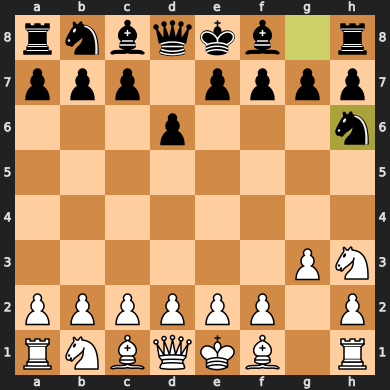

In [86]:
test_board